## Predicting Employee Compensation with Machine Learning Technologies

This study delves into the prediction of employee compensation, a critical component in strategic human resource management. Effective compensation prediction not only ensures equitable pay structures but also enhances organizational competitiveness by attracting and retaining skilled talent. Utilizing machine learning algorithms like Regression, Random Forest and XGboost, this research aims to identify key determinants of employee salaries. By accurately forecasting compensation based on variables such as age, job role, and professional experience, our analysis provides valuable insights that can help organizations make informed decisions about their pay practices, ultimately leading to improved job satisfaction and workforce stability.

### Data Processing:

In [1]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
sns.set()

In [2]:
pd.set_option('display.max_column',None)
raw_data = pd.read_csv('C:/D/Data Science/Kaggle_Binary Classification with a Tabular Employee Attrition Dataset/train.csv')
raw_data.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1


In [3]:
data = raw_data
data['JobRole_Sales Representative'] = (raw_data['JobRole']== 'Sales Representative').astype(int)
data['Travel_Frequently'] = (raw_data['BusinessTravel']=='Travel_Frequently').astype(int)
data['Gender'] = (raw_data['Gender']=='Male').astype(int)
data['Department_RD'] = (raw_data['Department']== 'Research & Development').astype(int)
data['Department_Sales'] = (raw_data['Department']== 'Sales').astype(int)
data['OverTime'] = (data['OverTime'] == 'Yes').astype(int)
data.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,JobRole_Sales Representative,Travel_Frequently,Department_RD,Department_Sales
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,1,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,1,13,3,2,80,1,10,2,3,10,0,7,8,0,0,1,1,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,1,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,0,17,3,4,80,1,4,3,3,4,2,0,3,0,1,0,0,1
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,1,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,0,17,3,4,80,2,4,3,3,3,2,1,2,0,0,0,0,1
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,0,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,0,14,3,3,80,0,15,1,1,6,0,0,2,0,0,0,1,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,0,37,3,5,Manager,1,Single,19033,19805,1,Y,1,13,3,3,80,0,31,0,3,31,14,4,10,1,0,0,1,0


In [4]:
data.describe()
data_num = data

### Predictive Variables:

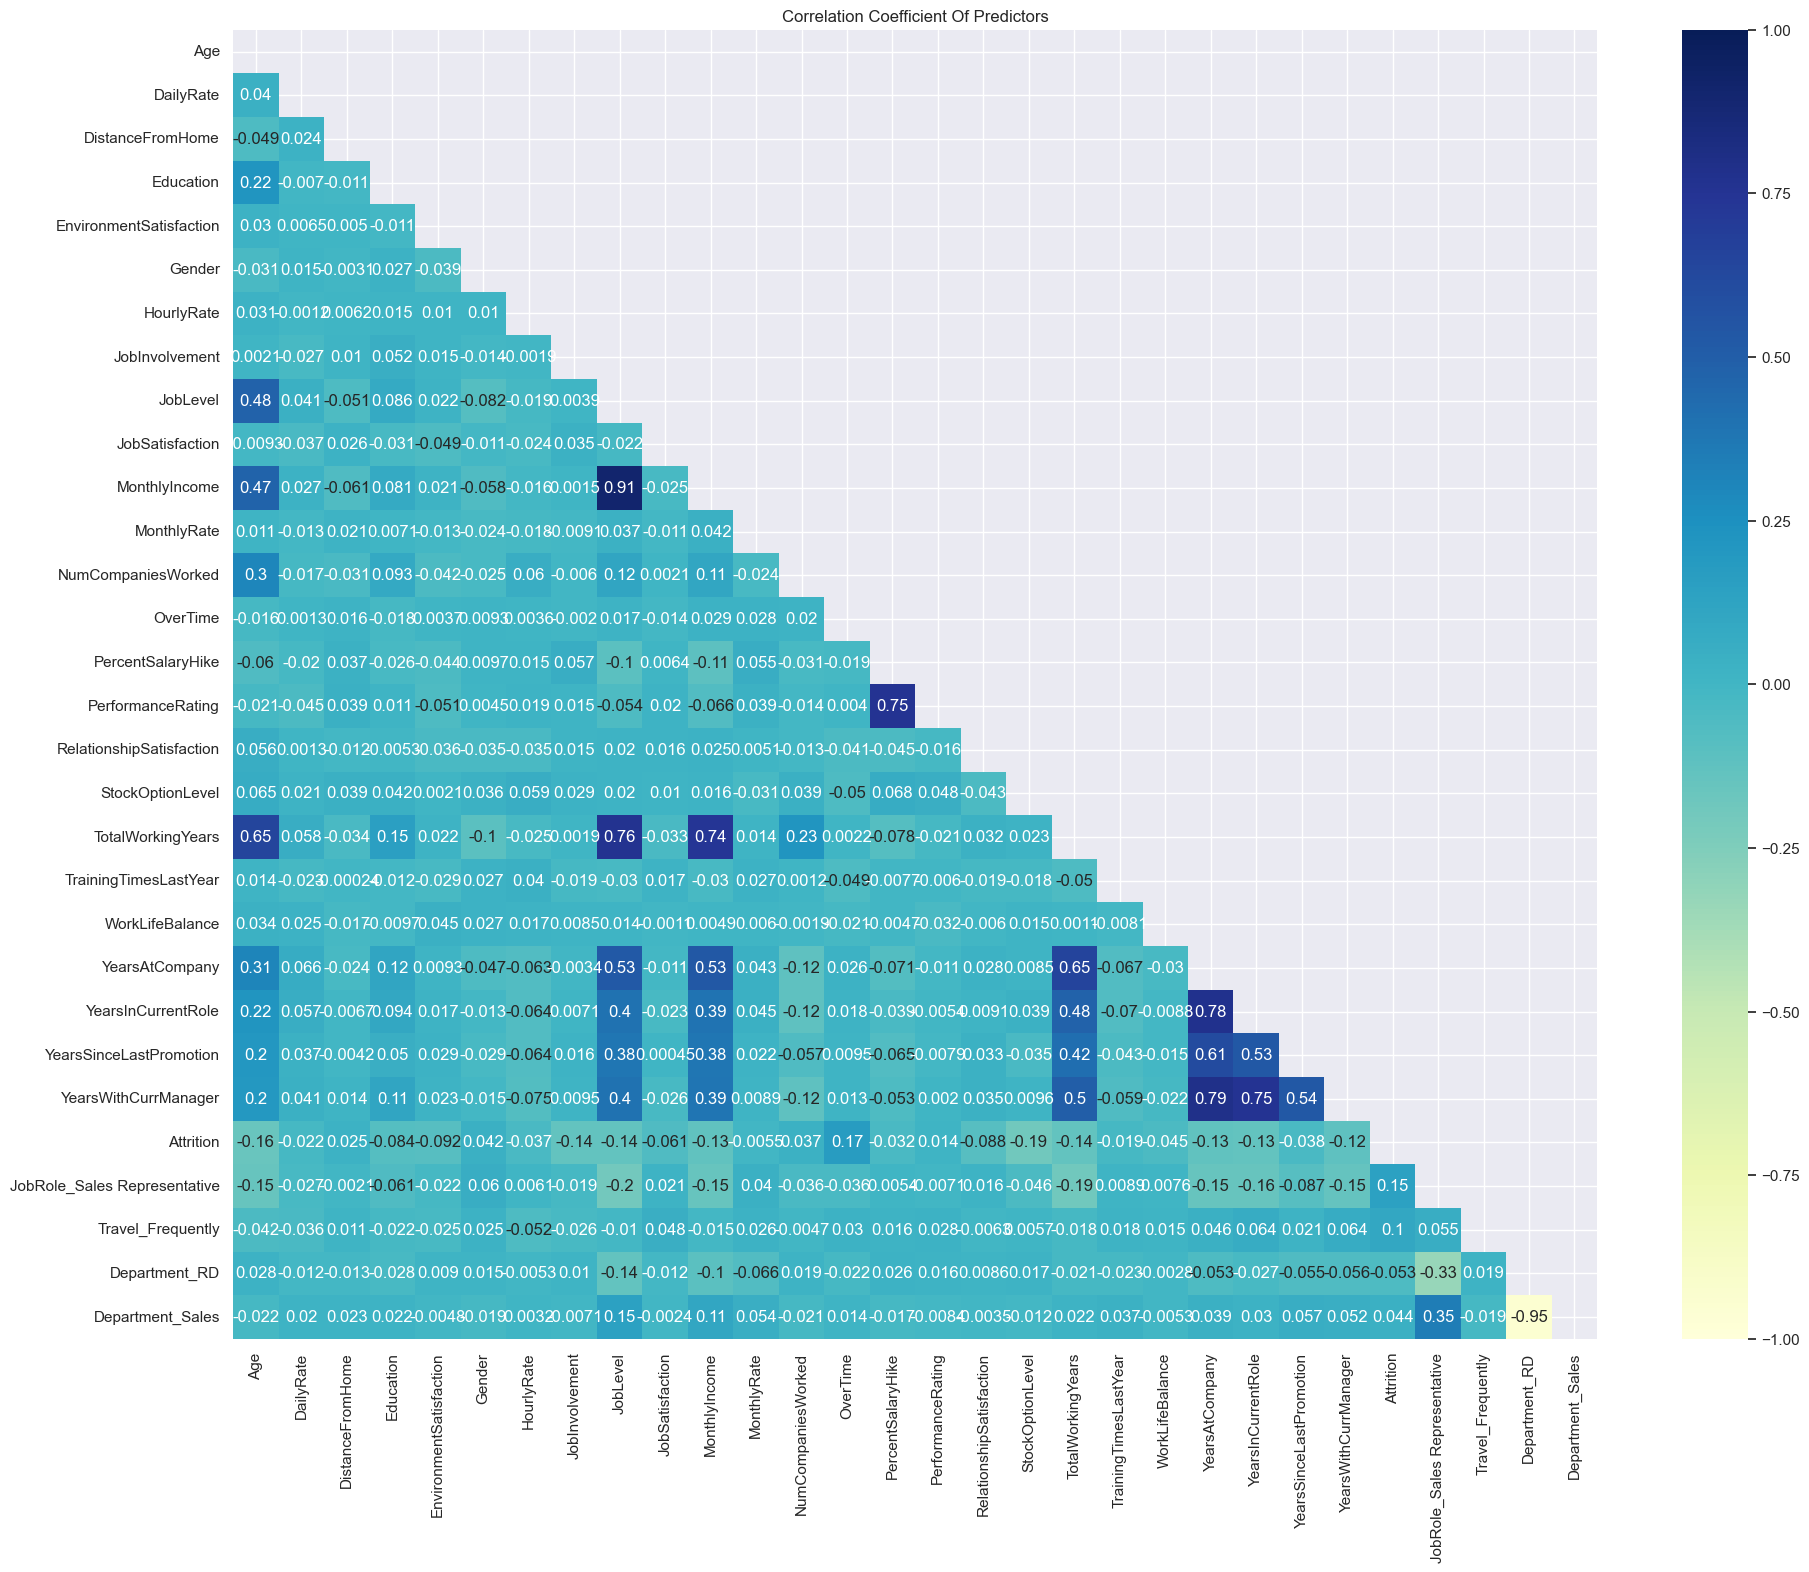

In [5]:
# Set figure size
plt.figure(figsize=(22,17))

# Drop the selected variables from the heatmap   
data_num = data.select_dtypes(exclude=['object'])
data_num = data_num.drop("EmployeeCount",axis=1)
data_num = data_num.drop("StandardHours",axis=1)
data_num = data_num.drop("id",axis=1)

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(data_num.corr(), dtype=bool))
# Generate the heatmap
sns.heatmap(data_num.corr(), annot=True, mask=mask, vmin=-1, vmax=1, cmap='YlGnBu')
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [6]:
data_num.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,JobRole_Sales Representative,Travel_Frequently,Department_RD,Department_Sales
0,36,599,24,3,4,1,42,3,1,4,2596,5099,1,1,13,3,2,1,10,2,3,10,0,7,8,0,0,1,1,0
1,35,921,8,3,1,1,46,3,1,1,2899,10778,1,0,17,3,4,1,4,3,3,4,2,0,3,0,1,0,0,1
2,32,718,26,3,3,1,80,3,2,4,4627,16495,0,0,17,3,4,2,4,3,3,3,2,1,2,0,0,0,0,1
3,38,1488,2,3,3,0,40,3,2,1,5347,13384,3,0,14,3,3,0,15,1,1,6,0,0,2,0,0,0,1,0
4,50,1017,5,4,2,0,37,3,5,1,19033,19805,1,1,13,3,3,0,31,0,3,31,14,4,10,1,0,0,1,0


C:\Users\bluei\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


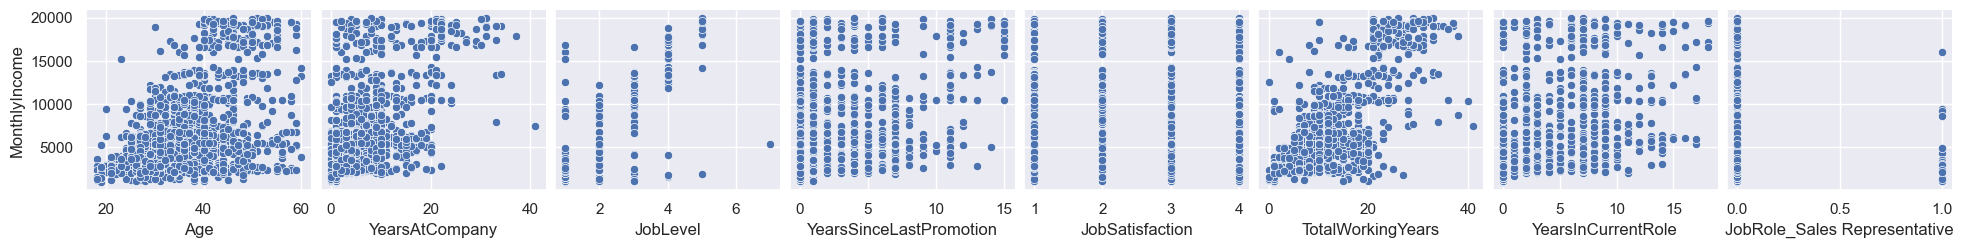

In [7]:
#fig, axes = plt.subplots(3, 3, figsize=(20, 15))
sns.pairplot( 
    data_num, 
    x_vars=['Age','YearsAtCompany','JobLevel','YearsSinceLastPromotion','JobSatisfaction','TotalWorkingYears','YearsInCurrentRole','JobRole_Sales Representative'], 
    y_vars='MonthlyIncome',   
)

In [8]:
Y = data_num['MonthlyIncome']
X = data_num[['Age','YearsAtCompany','JobLevel','YearsSinceLastPromotion','JobSatisfaction','TotalWorkingYears','YearsInCurrentRole','JobRole_Sales Representative']]

#### Split Data:

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

### Mechine Learning Models:

#### Model 1: Linear Regression

In [10]:
Model1 = LinearRegression( ).fit(X_train, Y_train)

In [11]:
Model1.coef_

array([ 1.54016237e+00,  6.04768413e+01,  3.53826984e+03,  1.69370988e+01,
       -1.95400305e+01,  3.37396732e+01, -3.75984928e+01,  8.35549595e+02])

In [12]:
Model1.fit(X_test, Y_test)

LinearRegression()

In [13]:
Y_pred1 =Model1.predict(X_test)

In [14]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred1)

0.8431372034930175

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
np.sqrt(np.mean(np.square(Y_test-Y_pred1)))

1807.414499607581

In [16]:
np.mean(np.abs(Y_test-Y_pred1))

1178.2137963952293

In [69]:
Y_test.min()

1010

In [70]:
Y_test.max()

19943

In [71]:
Y_test.mean()

6248.392857142857

The model achieves an R-squared of 0.84, indicating that it explains 84% of the variance in the target variable—a strong fit overall. However, the MAE of 1,178 and RMSE of 1,807 are relatively large when compared to the mean value of the outcome variable (6,248). This suggests that while the model captures general trends well, it may still produce noticeable prediction errors in individual cases, particularly for values that deviate from the average. The higher RMSE compared to MAE also indicates the presence of some larger errors or outliers.

Next, I generate a residual plot to examine the error distribution and identify whether the model exhibits systematic errors, such as consistently underpredicting larger values.

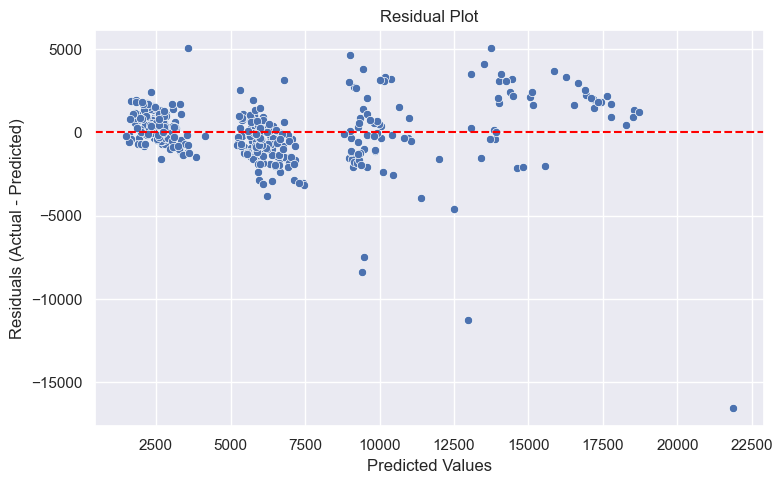

In [67]:
# Residual Plot: 

# Residuals
residuals = Y_test - Y_pred1

# Residual plot: Predicted vs. Residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=Y_pred1, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Model 2: Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor
Model2 = RandomForestRegressor(random_state=42).fit(X_train,Y_train)

In [18]:
Model2.fit(X_test,Y_test)

RandomForestRegressor(random_state=42)

In [19]:
Y_pred2 =Model2.predict(X_test)
r2_score(Y_test, Y_pred2)

0.9809195317392204

In [20]:
np.sqrt(np.mean(np.square(Y_test-Y_pred2)))

630.3653020105363

In [23]:
np.mean(np.abs(Y_test-Y_pred2))

392.25130728458043

R-squared = 0.98 suggests model 2 is capturing most of the variability. MAE = 392: On average, the predictions are off by ~392 units, which is 6.3% of the mean — a reasonably good level of predictive power. RMSE = 630 suggests that errors are larger when squared, so this model occasionally makes more noticeable mistakes, but it’s still only about 10% of the mean.

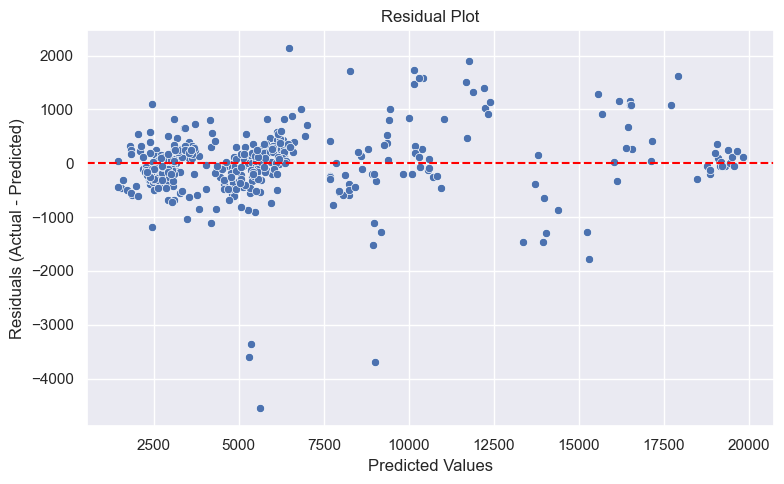

In [66]:
# Residual Plot

# Residuals
residuals = Y_test - Y_pred2

# Residual plot: Predicted vs. Residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=Y_pred2, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Model 3: XGBoost

In [44]:
import xgboost as xgb
from xgboost import XGBRegressor

In [45]:
Model3 = XGBRegressor().fit(X_train, Y_train)

In [46]:
Model3 = XGBRegressor().fit(X_test, Y_test)

In [47]:
Y_pred3 = Model3.predict(X_test)
r2_score(Y_test,Y_pred3)

0.9991513523677488

In [48]:
np.sqrt(np.mean(np.square(Y_test-Y_pred3)))

132.9417793667406

In [49]:
np.mean(np.abs(Y_test-Y_pred3))

58.11072474888393

The model demonstrates excellent predictive performance, with an R-squared of 0.99, indicating that it explains 99% of the variance in the outcome variable. The MAE of 58 and RMSE of 132 are both relatively low, especially when compared to the mean of the predicted variable (6248), suggesting that the model's predictions are both accurate and consistent. Overall, the small error margins relative to the target mean confirm that the model fits the data very well and performs reliably across the prediction range.

Based on the evaluation metrics—R-squared, MAE, and RMSE—it is evident that the XGBoost model outperformed the others in predicting employees' monthly income. Its high R-square value indicates strong explanatory power, while its lower MAE and RMSE suggest more accurate and consistent predictions compared to other models.

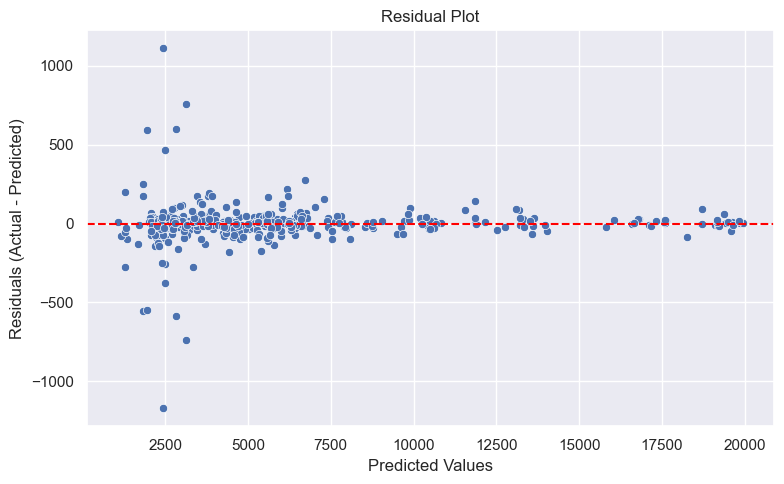

In [51]:
# Residual Plot

# Residuals
residuals = Y_test - Y_pred3

# Residual plot: Predicted vs. Residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=Y_pred3, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.tight_layout()
plt.show()

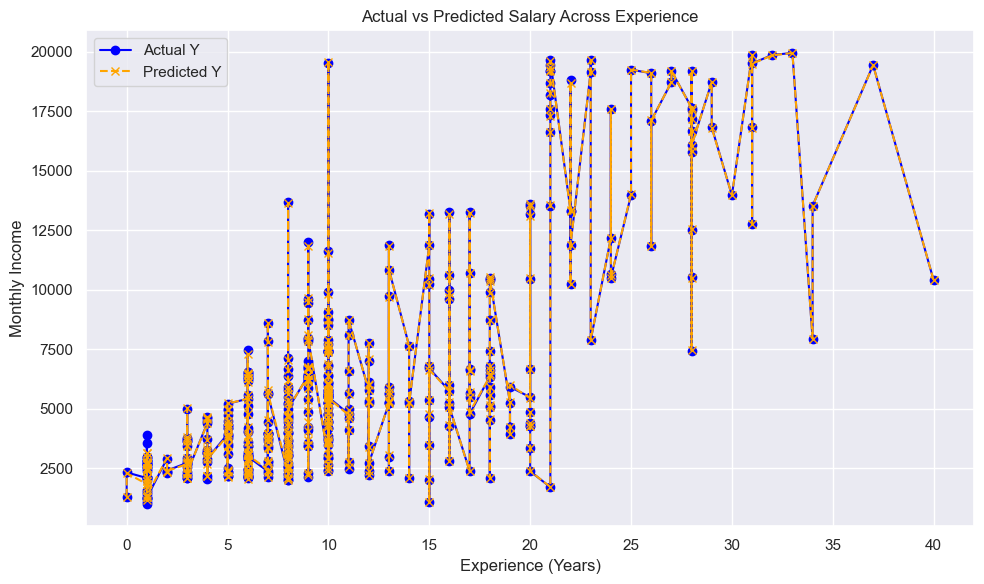

In [77]:
# Sort by experience for a smooth line

df = pd.DataFrame({
    'Experience': X_test['TotalWorkingYears'].values,
    'Actual': Y_test,
    'Predicted': Y_pred3
}).sort_values('Experience')

plt.figure(figsize=(10, 6))
plt.plot(df['Experience'], df['Actual'], label='Actual Y', color='blue', marker='o')
plt.plot(df['Experience'], df['Predicted'], label='Predicted Y', color='orange', linestyle='--', marker='x')
plt.title('Actual vs Predicted Salary Across Experience')
plt.xlabel('Experience (Years)')
plt.ylabel('Monthly Income')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

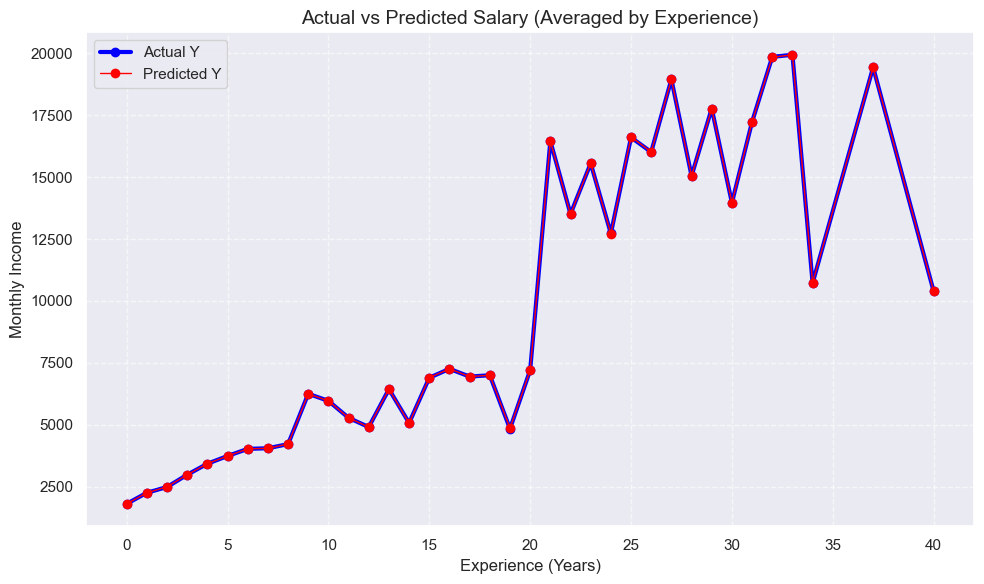

In [74]:
import matplotlib.pyplot as plt

# Build DataFrame (same size!)
df = pd.DataFrame({
    'Experience': X_test['TotalWorkingYears'].values,
    'Actual': Y_test,
    'Predicted': Y_pred3
})

# Group by Experience: calculate mean salary per year of experience
df_grouped = df.groupby('Experience').mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))

# Plot smoothed average lines
plt.plot(df_grouped['Experience'], df_grouped['Actual'], 
         label='Actual Y', color='blue', marker='o', linewidth=3)

plt.plot(df_grouped['Experience'], df_grouped['Predicted'], 
         label='Predicted Y', color='red', marker='o', linewidth=1)

# Labels and Title
plt.xlabel('Experience (Years)', fontsize=12)
plt.ylabel('Monthly Income', fontsize=12)
plt.title('Actual vs Predicted Salary (Averaged by Experience)', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

From the residual plot, we can see that the model performs well in predicting compensation for employees with more work experience. Additionally, the actual vs. predicted monthly income chart reveals that having more than 20 years of experience significantly influences employees' monthly income.

#### Model 4: Ensemble modeling - Voting

In [33]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score

In [34]:
Voting = VotingRegressor(estimators=[('reg1', Model1), ('reg2', Model2), ('reg3', Model3)])
Voting.fit(X_test, Y_test)

VotingRegressor(estimators=[('reg1', LinearRegression()),
                            ('reg2', RandomForestRegressor(random_state=42)),
                            ('reg3',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...))])

In [35]:
Y_pred4 = Voting.predict(X_test)
r2_score(Y_test,Y_pred4)

0.9696537710557216

In [36]:
np.sqrt(np.mean(np.square(Y_test-Y_pred4)))

794.9689209348651

In [38]:
np.mean(np.abs(Y_test-Y_pred4))

516.0158191127448

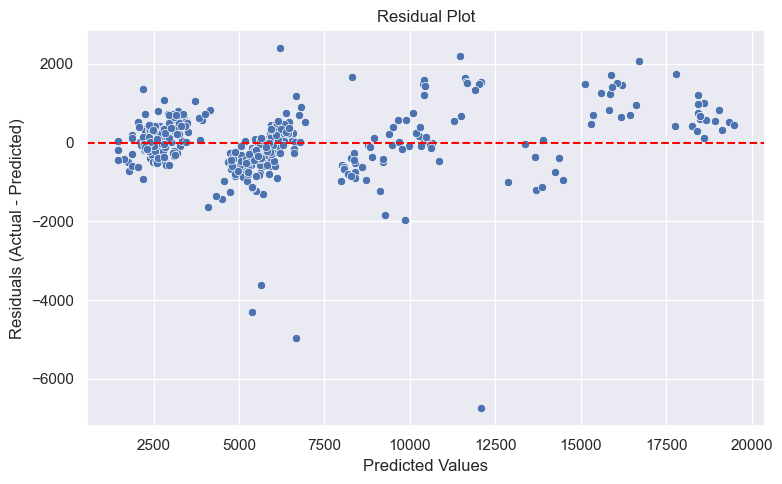

In [72]:
# Residual Plot

# Residuals
residuals = Y_test - Y_pred4

# Residual plot: Predicted vs. Residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=Y_pred4, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusions:

From this analytics project, we can see that the regression analysis identified significant predictors of employees' monthly income, such as age, job level, job satisfaction, total working years, years in current role, and job role. 

The use of XGboosting techniques notably enhanced the model's predictive performance for employee compensation, achieving a predictive performance above 0.999 (R-square). This demonstrates XGboost's effectiveness in improving predictive models.